## PAMTRA Combined HMP analysis

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pyPamtra
import datetime
import numpy as np
import pandas as pd
import pickle
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import xarray as xr
get_ipython().run_line_magic('matplotlib', 'inline')

from scipy.stats import pearsonr
import os
import sys
sys.path.insert(1,os.getcwd()+"//..//retrieval//")
import Regression_Retrieval
import PAMTRA_sim_analysis

In [2]:
import os 
plot_path=os.getcwd()+"/plots/"
take_all_available_files=True
take_random_days=False
take_snd_random_days=False
take_rd_random_days=False
add_noise=True
ar_plot_path=plot_path+"synth_ARs/"
if take_random_days:
    ar_plot_path=plot_path+"rand_days/"
    if take_snd_random_days:
        ar_plot_path=plot_path+"snd_rand_days/"
    if take_rd_random_days:
        ar_plot_path=plot_path+"rd_rand_days/"
if take_all_available_files:
    ar_plot_path=plot_path+"new_all_days/"
if not os.path.exists(plot_path):
    os.makedirs(plot_path)
if not os.path.exists(ar_plot_path):
    os.makedirs(ar_plot_path)

hour_to_analyse="12"
do_appendix_plots=False

### Simulated Days existent

In [3]:
PAMTRASIM_analysis=PAMTRA_sim_analysis.PAMTRASIM_analysis
all_available_days=PAMTRASIM_analysis.list_all_simulated_days(data_path="/work/bb1320/hdorff/pamtra_hamp_retrieval/",hour=hour_to_analyse)
#
#print(all_available_days)
# list of predefined days
#['19790312', '19810330', '19810424', '19820320', '19820416', '19830316', '19830331', '19830414', 
#'19840308', '19840413', '19840428', '19880330', '19890422', '19900409', '19900411', '19900418', 
#'19910301', '19910428', '19920302', '19920413', '19930303', '19930430', '19940421', '19950306', 
#'19950317', '19970322', '19980324', '19980409', '20030415', '20050401', '20060317', '20070324',
#'20080313', '20080404', '20080411', '20080430', '20090324', '20100323', '20110311', '20110329', 
#'20110413', '20140309', '20140330', '20160409', '20180319', '20180326', '20200326', '20220315', 
#'20220316', '20220410']


56  days are already simulated
['19790312', '19810330', '19810424', '19820320', '19820416', '19830316', '19830331', '19830414', '19840308', '19840413', '19840428', '19880330', '19890422', '19900409', '19900411', '19900418', '19910301', '19910428', '19920302', '19920413', '19930303', '19930430', '19940421', '19950306', '19950317', '19970322', '19980324', '19980409', '20030415', '20050401', '20060317', '20070324', '20080313', '20080404', '20080411', '20080430', '20090324', '20100323', '20110311', '20110317', '20110329', '20110413', '20110423', '20120312', '20130313', '20140309', '20140330', '20160311', '20160409', '20180224', '20180225', '20180319', '20180326', '20200326', '20210402', '20220310']


In [4]:
if not take_random_days:
    synth_ar_dates=["20110317",
        "20110423","20150314",
        "20160311","20180224",
        "20180225","20190319",
        "20200416","20200419"
    ]
else:
    synth_ar_dates=['19820320','19900409',
                    '19910428', '19950306',
                    '19970322','20050418',
                    '20170425','20210331']
    if take_snd_random_days:
        synth_ar_dates=['19820320', '19840308', 
                         '19900409', '19910428',
                         '19950306', '19970322',
                         '20080313', '20110311',
                         ]
        #['20040301', '19970410',
                       # '20060417', '19940330',
                       # '20140322', '19950410',
                       # '19990423', '20190421'] #second dates
    # third days
if take_all_available_files:
        synth_ar_dates=['19790312', '19810330', '19810424', '19820320', '19820416', '19830316', '19830331', '19830414',
                        '19840308', '19840413', '19840428', '19880330', '19890422', '19900409', '19900411', '19900418',
                        '19910301', '19910428', '19920302', '19920413', '19930303', '19930430', '19940421', '19950306',
                        '19950317', '19970322', '19980324', '19980409', '20030415', '20050401', '20060317', '20070324',
                        '20080313', '20080404', '20080411', '20080430', '20090324', '20100323', '20110311', '20110329', 
                        '20110413', '20140309', '20140330', '20160409', '20180319', '20180326', '20200326', '20220315', 
                        '20220316', '20220410']#all_available_days -- will be updated
        synth_ar_dates=all_available_days
new_dates=synth_ar_dates #['19820416', '19880330', '20080411']#synth_ar_dates
                    #new_dates=["20220312","20220313","20220314","20220315","20220316","20220320","20220321"]# ['20190411', '20020413', '19920330', '19900312', '20200420', '19950404', '20210421', 
           #'20170301', '19790313','19860407', '20160411', '20140320', '19930304', '19790426',
           #'20020401', '19920415', '19820322', '19840425', '19820414', '20060330']
print("Dates for retrieval:",new_dates)

Dates for retrieval: ['19790312', '19810330', '19810424', '19820320', '19820416', '19830316', '19830331', '19830414', '19840308', '19840413', '19840428', '19880330', '19890422', '19900409', '19900411', '19900418', '19910301', '19910428', '19920302', '19920413', '19930303', '19930430', '19940421', '19950306', '19950317', '19970322', '19980324', '19980409', '20030415', '20050401', '20060317', '20070324', '20080313', '20080404', '20080411', '20080430', '20090324', '20100323', '20110311', '20110317', '20110329', '20110413', '20110423', '20120312', '20130313', '20140309', '20140330', '20160311', '20160409', '20180224', '20180225', '20180319', '20180326', '20200326', '20210402', '20220310']


In [5]:
var_to_retrieve="IWV"

In [6]:
def add_noise_to_tb(tb_df):
    # create randomn vector
    # k,v band noise 0:14
    for kv_band_freq in range(14):
        random_noise=np.random.random_sample(tb_df.shape[0])
        values=pd.Series(data=-0.25 + 0.5*random_noise,index=tb_df.index)
        tb_df.iloc[:,kv_band_freq]=tb_df.iloc[:,kv_band_freq]+values
    for other_freq in np.arange(14,int(tb_df.shape[1]-1)):
        random_noise=np.random.random_sample(tb_df.shape[0])
        values=pd.Series(data=-0.5 + 1.0*random_noise,index=tb_df.index)
        tb_df.iloc[:,other_freq]=tb_df.iloc[:,other_freq]+values

    return tb_df

def get_data_for_obs_height(obs_height,obs_heights,new_dates):
    print("Observation height:",height)
    h=obs_heights.iloc[obs_heights.values==obs_height].index
    for d,date_to_analyse in enumerate(new_dates):#synth_ar_dates):
        print(date_to_analyse)
        sim_cls=PAMTRASIM_analysis(data_path="/work/bb1320/hdorff/pamtra_hamp_retrieval/",date=date_to_analyse,hour=hour_to_analyse)
        #if d==0:
            # for height indices
            #sim_cls.open_era5_tbs()
            #tbs=sim_cls.pamtra_ds
        sim_cls.get_era5_hmps()
        temp_era5_hmp=sim_cls.era5_hmp.copy()
        sim_cls.open_pamtra_tbs_ocean()
        height_tbs=np.squeeze(sim_cls.tb_da.isel(nout=h).values,axis=1)
        temp_df=pd.DataFrame(data=height_tbs,columns=sim_cls.tb_da.freq)
        temp_df.index=temp_df.index+int(date_to_analyse)*1000 
        temp_df["Date"]=date_to_analyse
        del temp_df[182.71]
        if d==0:
            tb_df=temp_df
            
            HMP_df=temp_era5_hmp
        else:
            tb_df=pd.concat([tb_df,temp_df])
            HMP_df=pd.concat([HMP_df,temp_era5_hmp])
    if add_noise:
        print("add noise to bright band temperatures")
        tb_df=add_noise_to_tb(tb_df)
    
    return HMP_df,tb_df

#########################################################################################
#PAMTRASIM_analysis=PAMTRA_sim_analysis.PAMTRASIM_analysis
HMP_dict={}
TBs_dict={}
HMP_df=pd.DataFrame(columns=["Date","IWV","LWP","IWP","SWP","RWP"])
obs_heights=pd.Series(data=[16000.,15400.,15200.,15000.,14800.,14600.,14400.,14200.,
             14000.,13800.,13600., 13400., 13200., 13000., 12800., 12600., 12400., 12200.,
             12000., 11800.,11600., 11400., 11200., 11000., 10800., 10600., 10400., 10200., 10000.,
             9800.,9600.,  9400.,  9200.,  9000.,  8800.,  8600.,  8400.,  8200.,  8000.,
             7800.,7600.,  7400.,  7200.,  7000.])


for h,height in enumerate(obs_heights):
    HMP_df,tb_df=get_data_for_obs_height(height,obs_heights,new_dates)
    
    HMP_dict[str(int(height))]=HMP_df
    TBs_dict[str(int(height))]=tb_df

Observation height: 16000.0
19790312
19810330
19810424
19820320
19820416
19830316
19830331
19830414
19840308
19840413
19840428
19880330
19890422
19900409
19900411
19900418
19910301
19910428
19920302
19920413
19930303
19930430
19940421
19950306
19950317
19970322
19980324
19980409
20030415
20050401
20060317
20070324
20080313
20080404
20080411
20080430
20090324
20100323
20110311
20110317
20110329
20110413
20110423
20120312
20130313
20140309
20140330
20160311
20160409
20180224
20180225
20180319
20180326
20200326
20210402
20220310
add noise to bright band temperatures
Observation height: 15400.0
19790312
19810330
19810424
19820320
19820416
19830316
19830331
19830414
19840308
19840413
19840428
19880330
19890422
19900409
19900411
19900418
19910301
19910428
19920302
19920413
19930303
19930430
19940421
19950306
19950317
19970322
19980324
19980409
20030415
20050401
20060317
20070324
20080313
20080404
20080411
20080430
20090324
20100323
20110311
20110317
20110329
20110413
20110423
20120312
201303

### Histogram HMP (exemplary height)

In [7]:
if do_appendix_plots:
    grouped_HMP_df = HMP_df.groupby('Date')
    hmp_fig=plt.figure(figsize=(12,9))
    ax1=hmp_fig.add_subplot(111)
    if var_to_retrieve=="IWV":
        hmp_bins=np.linspace(0,25,26)
        unit=" (kg/m2)"
    else:
        hmp_bins=np.linspace(0,300,31)
        unit=" (g/m2)"
    for date in [*grouped_HMP_df.groups.keys()]:
        sub_hist=HMP_df[HMP_df["Date"]==date]
        hmp=sub_hist[var_to_retrieve]
        if not var_to_retrieve=="IWV":
            hmp=hmp*1000
        ax1.hist(hmp,histtype="step",alpha=0.8,bins=hmp_bins)
    ax2=ax1.twinx()
    ax1.set_xlabel(var_to_retrieve+unit)
    hmp_all=HMP_df[var_to_retrieve]
    if not var_to_retrieve=="IWV":
        hmp_all=hmp_all*1000
        #ax1.set_xscale("log")
    ax2.hist(hmp_all,histtype="step",alpha=1.0,bins=hmp_bins,color="k",linewidth=2)
    hmp_fig.savefig(ar_plot_path+"Synth_AR_"+var_to_retrieve+"_dist.png",dpi=200,bbox_inches="tight")
    #plt.hist(car_df.get_group('rwd')['price'], edgecolor='black',color='brown',rwidth=0.7,alpha=0.6,label='rwd')

### TB hist (exemplary height)

In [8]:
if do_appendix_plots:
    import matplotlib
    #### Hydrometeor histogram
    matplotlib.rcParams.update({"font.size":11})
    import seaborn as sns
    tb_hmp_fig,axes=plt.subplots(6,4,figsize=(12,16))

    i=0
    colors_list=["k","darkslateblue","darkmagenta","violet","thistle","gray","silver",#
            "maroon","red","tomato","indianred","salmon","rosybrown","grey",#
             "darkgreen","green","forestgreen","mediumseagreen","darkseagreen",#
            "k","midnightblue","blue","royalblue","steelblue","skyblue","grey"]
    #print(HMP_df.shape)
    #print(tb_df.shape)

    hmp_data=HMP_df[var_to_retrieve].copy()
    if not var_to_retrieve=="IWV":
        hmp_data*=1000

    for ax in axes.flat:
        tb=tb_df.iloc[:,i]
        ax.scatter(tb,hmp_data,s=1,c=colors_list[i])
        ax.set_ylim([0,hmp_bins[-1]])
        ax.set_xlim([100,300])
        ax.text(225,17.5,s=str(round(tb_df.columns[i],2))+" GHz")
        corr, _ = pearsonr(tb,hmp_data)
        ax.text(90,17.5,"r="+str(round(corr,2)))
        i+=1
    
    sns.despine(offset=10)               
    tb_hmp_fig.subplots_adjust(hspace=0.4,wspace=0.4)
    tb_hmp_fig.suptitle("TB - "+var_to_retrieve+" Correlation",y=0.925)
    tb_hmp_fig.savefig(ar_plot_path+"Synth_ARs_TB_"+var_to_retrieve+"_Corr.png",dpi=300,bbox_inches="tight")

# Retrieval block (exemplary height)

In [9]:
def single_height_retrieval(obs_height,TBs_dict,HMP_dict):
    HMP_df=HMP_dict[str(int(obs_height))]
    tb_df=TBs_dict[str(int(obs_height))]
    brightness_Ts=tb_df.copy()
    state_vector=HMP_df[var_to_retrieve].values
    if not var_to_retrieve=="IWV":
        state_vector*=1000
    order=2
    # Perform Regression-Retrieval
    Retrieval=retrieval(state_vector,var_to_retrieve,brightness_Ts,order,synth_ar_dates,ar_plot_path,added_noise=add_noise,obs_height=obs_height) #---> add obs height for retrieval
    Retrieval.entire_regression()
    Retrieval.m_est_as_csv()
    # Get the retrieval coefficients estimates (fits)
    m_est=Retrieval.m_est
    return m_est


retrieval=Regression_Retrieval.Regression_Retrieval
HMP_df[var_to_retrieve]

19790312000     4.700625
19790312001     4.738412
19790312002     4.794320
19790312003     4.775491
19790312004     4.249304
                 ...    
20220310518    10.697485
20220310519    11.071393
20220310520    10.686350
20220310521     9.844133
20220310522     8.767498
Name: IWV, Length: 27165, dtype: float64

## Training

In [10]:
for h,height in enumerate(obs_heights):
    single_height_retrieval(height,TBs_dict,HMP_dict)
#brightness_Ts=tb_df.copy()
#state_vector=HMP_df[var_to_retrieve].values
#if not var_to_retrieve=="IWV":
#    state_vector*=1000
#order=2
# Perform Regression-Retrieval
#Retrieval=retrieval(state_vector,var_to_retrieve,brightness_Ts,order,synth_ar_dates,ar_plot_path,added_noise=add_noise)
#Retrieval.entire_regression()
#Retrieval.m_est_as_csv()
# Get the retrieval coefficients estimates (fits)
#m_est=Retrieval.m_est
#m_est.shape
#Tb_K_reg=#Retrieval.build_K_reg(y,order=2)

Retrieval coeffs saved as: /home/u/u300737/era5_hamp_pamtra/hamp_retrieval_haloac3/notebooks/plots/new_all_days/IWV_Retrieval_coeffs_16000.csv
Retrieval coeffs saved as: /home/u/u300737/era5_hamp_pamtra/hamp_retrieval_haloac3/notebooks/plots/new_all_days/IWV_Retrieval_coeffs_15400.csv
Retrieval coeffs saved as: /home/u/u300737/era5_hamp_pamtra/hamp_retrieval_haloac3/notebooks/plots/new_all_days/IWV_Retrieval_coeffs_15200.csv
Retrieval coeffs saved as: /home/u/u300737/era5_hamp_pamtra/hamp_retrieval_haloac3/notebooks/plots/new_all_days/IWV_Retrieval_coeffs_15000.csv
Retrieval coeffs saved as: /home/u/u300737/era5_hamp_pamtra/hamp_retrieval_haloac3/notebooks/plots/new_all_days/IWV_Retrieval_coeffs_14800.csv
Retrieval coeffs saved as: /home/u/u300737/era5_hamp_pamtra/hamp_retrieval_haloac3/notebooks/plots/new_all_days/IWV_Retrieval_coeffs_14600.csv
Retrieval coeffs saved as: /home/u/u300737/era5_hamp_pamtra/hamp_retrieval_haloac3/notebooks/plots/new_all_days/IWV_Retrieval_coeffs_14400.csv

## Testing

In [14]:
date_to_test="20150314"#"20161013"#"20150314"#"20161013"
sim_cls=PAMTRASIM_analysis(date=date_to_test,hour="10")
sim_cls.open_pamtra_tbs_ocean()
sim_cls.get_era5_hmps()
print(sim_cls.era5_hmp)
#sys.exit()
tb_df_new=pd.DataFrame(data=sim_cls.tb_da.values,columns=sim_cls.tb_da.freq)
print(tb_df_new)
#tb_df_new=tb_df_new.loc[sim_cls.open_ocean==1]
hmp_day=sim_cls.era5_hmp[var_to_retrieve]
if not var_to_retrieve=="IWV":
    hmp_day*=1000

FileNotFoundError: [Errno 2] No such file or directory: b'/scratch/u/u300737/pamtra_hamp_20150314_10.nc'

In [ ]:
del tb_df_new[182.71]
Retrieval.y=tb_df_new
#print(tb_df_new)
Retrieval.build_K_reg()
TB_K_reg_new=Retrieval.K_reg
#print(TB_K_reg_new)
hmp_retrieved=m_est.dot(TB_K_reg_new.T)

## Compare Testing and Truth

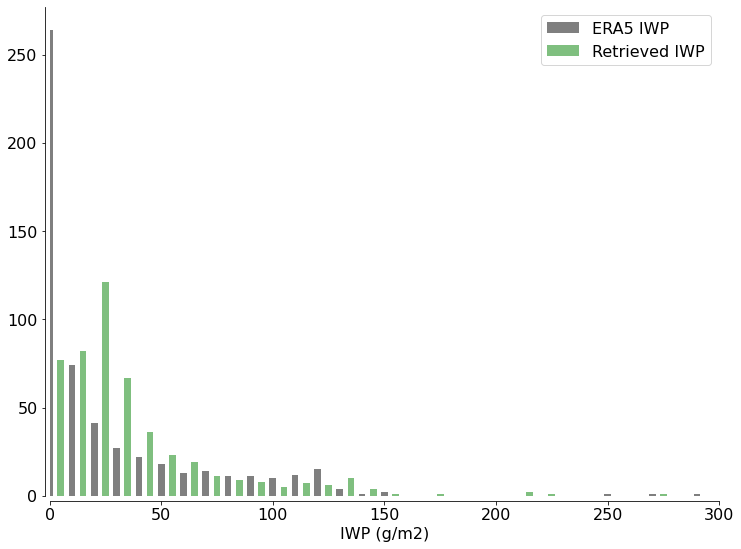

In [14]:
import seaborn as sns

#import matplotlib
matplotlib.rcParams.update({"font.size":16})
iwv_test_fig=plt.figure(figsize=(12,9))
ax1=iwv_test_fig.add_subplot(111)
ax1.hist(hmp_day,rwidth=0.3,align="left",alpha=0.5,bins=hmp_bins,color="k",label="ERA5 "+var_to_retrieve)
ax1.hist(hmp_retrieved,rwidth=0.3,align="mid",alpha=0.5,bins=hmp_bins,color="green",label="Retrieved "+var_to_retrieve)
if var_to_retrieve=="IWV":
    ax1.set_xlabel("IWV (kg/m2)")
else:
    ax1.set_xlabel(var_to_retrieve+" (g/m2)")
ax1.legend()
ax1.set_xlim([0,hmp_bins[-1]])
#ax1.set_ylim([0,150])
sns.despine(offset=5)
iwv_test_fig.savefig(ar_plot_path+var_to_retrieve+"_Retrieval_test_"+date_to_test+".png",dpi=200,bbox_inches="tight")


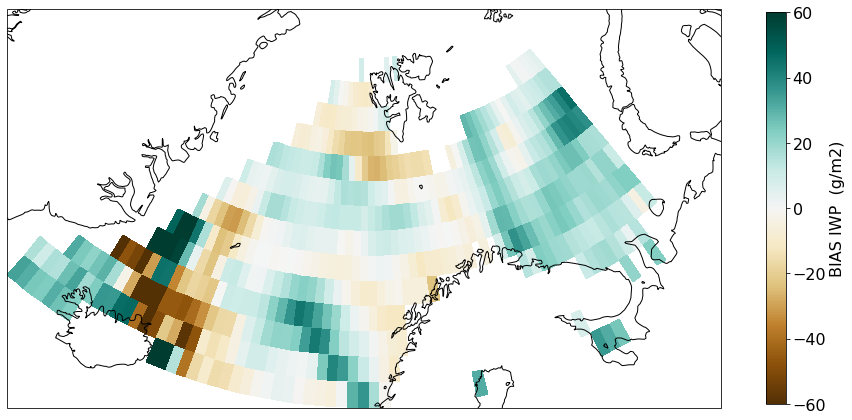

In [15]:
lat=sim_cls.era5_ds.lat[:,0].values
lon=sim_cls.era5_ds.lon[:,0].values
unique_lat=np.unique(lat)
unique_lon=np.unique(lon)
data_2d=pd.DataFrame(data=np.nan,index=unique_lat,columns=unique_lon)
hmp_error=hmp_retrieved-hmp_day
for i,hmp_value in enumerate(hmp_error.values):
    data_2d.loc[lat[i],lon[i]]=float(hmp_value)

data_2d=data_2d.iloc[::-1]
import cartopy.crs as ccrs
set_font=16
matplotlib.rcParams.update({'font.size':set_font})
fig=plt.figure(figsize=(16,12))
proj = ccrs.NorthPolarStereo(central_longitude=10)
data_crs = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
C1=ax.pcolormesh(data_2d.columns,data_2d.index,data_2d.values,vmin=-hmp_bins[-1]/5,vmax=hmp_bins[-1]/5,transform=data_crs,cmap='BrBG')
plt.colorbar(C1,label="BIAS "+var_to_retrieve+" "+unit,shrink=0.6)
ax.coastlines()
fig.savefig(ar_plot_path+var_to_retrieve+"_Retrieval_test_Map"+date_to_test+".png",dpi=200,bbox_inches="tight")


## Coefficient comparison

In [23]:
import glob
#print(plot_path)
coeff_paths=glob.glob(plot_path+"/*")
coeff_dict={}
fname="IWV_Retrieval_coeffs.csv"
for path in coeff_paths:
    sample_str=path.split("/")[-1]
    coeff_dict[sample_str]=pd.read_csv(path+"/"+fname)
    coeff_dict[sample_str].index=coeff_dict[sample_str]["Unnamed: 0"]
    del coeff_dict[sample_str]["Unnamed: 0"]
coeff_dict

FileNotFoundError: [Errno 2] No such file or directory: '/home/u/u300737/era5_hamp_pamtra/plots/halo_ac3/IWV_Retrieval_coeffs.csv'

In [16]:
mean_tb=tb_df.mean(axis=0)
iwv_contr_dict={}
iwv_contr_series=pd.Series(data=np.nan,index=mean_tb.index[:-1])
Retrieval.y=tb_df.iloc[0:2,:-1].values
Retrieval.build_K_reg()
Retrieval.K_reg.T
#print(coeff_dict["snd_rand_days"])
print("M_est",m_est)
print(m_est.shape)
print("Tbs K_reg ",Retrieval.K_reg.T[:,0].shape,Retrieval.K_reg.T[:,0])
m_est.dot(Retrieval.K_reg.T[:,0])
#for i in range(m_est.shape):
iwv_retrieved=np.sum([m_est[i]*Retrieval.K_reg.T[i,0] for i in range(m_est.shape[0])])    
print(iwv_retrieved)
#sys.exit()
#m_est.dot(Retrieval.K_reg.T)
for freq in iwv_contr_series.index:
    freq_str=str(freq)
    tb_step=tb_df.iloc[0,:-1]#mean_tb.loc[freq]
    tb_channel=tb_step.loc[freq]
    #print(tb_channel)
    #print(coeff_dict[sample_str].loc["offset"])
    iwv_contr_series.loc[freq]= coeff_dict[sample_str][freq_str].loc["b**2"]*tb_channel+\
                                    coeff_dict[sample_str][freq_str].loc["a**1"]*tb_channel
                                    #    coeff_dict[sample_str][freq_str].loc["offset"]
                                #coeff_dict[sample_str][freq_str].loc["a**1"]*tb_channel**2+\
#                               
iwv_contr_series.sum()+coeff_dict[sample_str][freq_str].loc["offset"]

M_est [ 2.81120203e+03 -1.50473936e+02  3.12681653e+02 -3.73976500e+02
  1.35094102e+03 -1.33252166e+03 -1.70970341e+02  3.94407801e+02
 -2.84318821e+02  5.93295265e+02 -4.83220700e+02  2.53183432e+02
 -3.11415227e+01  8.25498238e+00 -1.10617920e+00 -1.75382136e+01
 -4.84576216e+01  5.33748456e+01 -1.52704050e+02  5.54755015e+01
  7.07404151e+02 -7.15347613e+02  3.55634064e+01 -4.43994085e+01
  1.24451576e+01  1.48501629e-01  2.47737663e-01 -1.36688812e+00
  5.68785460e+00 -7.86055819e+00  4.23537389e+00 -1.14846986e+00
  6.67172247e-01 -1.32313833e+00  1.02420351e+00 -5.35905581e-01
  7.04477291e-02 -1.72685284e-02  8.65396503e-04  2.79173056e-02
  9.92228010e-02 -1.01643747e-01  3.24962531e-01 -1.18518860e-01
 -1.40698643e+00  1.42451919e+00 -7.10881790e-02  8.68333510e-02
 -2.45577014e-02]
(49,)
Tbs K_reg  (49,) [1.00000000e+00 1.53255204e+02 1.53719954e+02 1.52577529e+02
 1.51142213e+02 1.51261173e+02 1.52582930e+02 1.57908603e+02
 2.19255354e+02 2.34619269e+02 2.46554129e+02 2.462

NameError: name 'sys' is not defined